<a href="https://colab.research.google.com/github/carlyle1233/22-2_IT_mining-/blob/main/python_basics2_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

## Pandas

In [ ]:
x = [1, 1, 2, 2, 3, 4]

df_list=pd.DataFrame(x)
df_list
print(type(df_list))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
pd.DataFrame?

In [ ]:
fpath= 'https://raw.githubusercontent.com/ykjoy/mining/main/chipotle.csv'

df=pd.read_csv(fpath)
df



,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
df.shape

(4622, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
df.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


In [ ]:
df['quantity']

print('quantity의 최댓값:', df['quantity'].max())
print('quantity의 평균: ',df['quantity'].mean())

quantity의 최댓값: 15
quantity의 평균:  1.0757247944612722


In [ ]:
df[['item_name','item_price']]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39
4,Chicken Bowl,$16.98
...,...,...
4617,Steak Burrito,$11.75
4618,Steak Burrito,$11.75
4619,Chicken Salad Bowl,$11.25
4620,Chicken Salad Bowl,$8.75


In [ ]:
df[['item_name','item_price']][:4]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39


In [ ]:
df[df.quantity>5]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
3599,1443,7,Bottled Water,NaN,$10.50
3887,1559,8,Side of Chips,NaN,$13.52
4152,1660,10,Bottled Water,NaN,$15.00


In [ ]:
df.query('quantity>5 & quantity<10')

,order_id,quantity,item_name,choice_description,item_price
3599,1443,7,Bottled Water,NaN,$10.50
3887,1559,8,Side of Chips,NaN,$13.52


##데이터 조작하기 

In [ ]:
df_new=df.copy()
df_new=df_new.rename(columns={'item_name':'item'})
df_new=df_new.rename(columns={'order_id':'id'})
df_new=df_new.rename(columns={'item_price':'price'})
#df_new=df_new.rename(columns={'order_id':'id'})
#df_new=df_new.rename(columns={'order_id':'id'})
df_new

,id,quantity,item,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
df['name_len']=df['item_name'].apply(lambda x:len(x))
df

,order_id,quantity,item_name,choice_description,item_price,name_len
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,28
1,1,1,Izze,[Clementine],$3.39,4
2,1,1,Nantucket Nectar,[Apple],$3.39,16
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,37
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,12
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,13
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,13
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,18
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,18


In [ ]:
df.sort_values('quantity', ascending=False).head()

,order_id,quantity,item_name,choice_description,item_price,name_len
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,28
4152,1660,10,Bottled Water,NaN,$15.00,13
3887,1559,8,Side of Chips,NaN,$13.52,13
3599,1443,7,Bottled Water,NaN,$10.50,13
2441,970,5,Bottled Water,NaN,$7.50,13


In [ ]:
means=df.groupby('item_name').mean()

In [ ]:
i=1
a=1

for i in range(1,10):
   print(a, 'x', i, '=', a*i)

IndentationError: ignored

In [ ]:
t=1
i=1

for t in range(2,10):
  print('-----------')
  for i in range(1,10):
     print(t,'x',i,'=',t*i)



-----------
2 x 1 = 2
2 x 2 = 4
2 x 3 = 6
2 x 4 = 8
2 x 5 = 10
2 x 6 = 12
2 x 7 = 14
2 x 8 = 16
2 x 9 = 18
-----------
3 x 1 = 3
3 x 2 = 6
3 x 3 = 9
3 x 4 = 12
3 x 5 = 15
3 x 6 = 18
3 x 7 = 21
3 x 8 = 24
3 x 9 = 27
-----------
4 x 1 = 4
4 x 2 = 8
4 x 3 = 12
4 x 4 = 16
4 x 5 = 20
4 x 6 = 24
4 x 7 = 28
4 x 8 = 32
4 x 9 = 36
-----------
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
-----------
6 x 1 = 6
6 x 2 = 12
6 x 3 = 18
6 x 4 = 24
6 x 5 = 30
6 x 6 = 36
6 x 7 = 42
6 x 8 = 48
6 x 9 = 54
-----------
7 x 1 = 7
7 x 2 = 14
7 x 3 = 21
7 x 4 = 28
7 x 5 = 35
7 x 6 = 42
7 x 7 = 49
7 x 8 = 56
7 x 9 = 63
-----------
8 x 1 = 8
8 x 2 = 16
8 x 3 = 24
8 x 4 = 32
8 x 5 = 40
8 x 6 = 48
8 x 7 = 56
8 x 8 = 64
8 x 9 = 72
-----------
9 x 1 = 9
9 x 2 = 18
9 x 3 = 27
9 x 4 = 36
9 x 5 = 45
9 x 6 = 54
9 x 7 = 63
9 x 8 = 72
9 x 9 = 81


## 데이터 탐색 

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd 

chipo=pd.read_csv('/content/drive/MyDrive/Colab Notebooks_school/Colab Notebooks/아비혁/chipotle.csv')

display(chipo.head(10))
print(chipo.info())

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


### 1. 기술통계 정보 

In [6]:
chipo['order_id']=chipo['order_id'].astype(str)

print(chipo.describe())

print('총 주문 개수:', len(chipo['order_id'].unique()))
print('주문 받은 음식의 종류:', len(chipo['item_name'].unique()))

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000
총 주문 개수: 1834
주문 받은 음식의 종류: 50


### 2. 데이터 탐색과 시각화 

In [7]:
#주문 횟수가 많은 음식 10개 보여주기 

item_count=chipo['item_name'].value_counts()
print(item_count[:10])

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


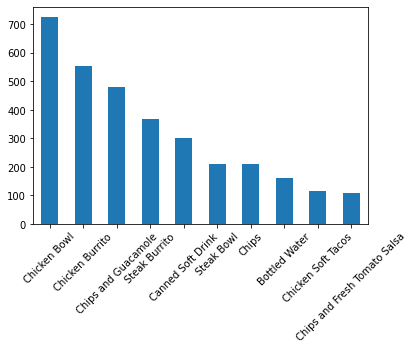

In [8]:
item_count[:10].plot.bar(rot=45)

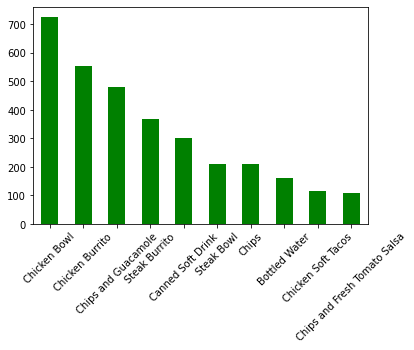

In [9]:
item_count[:10].plot(kind='bar',rot=45, color='g')

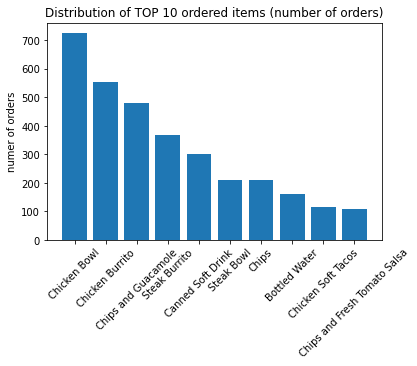

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt

x=item_count[:10].index.tolist()
y=item_count[:10].values.tolist()

plt.bar(x,y,align='center')
plt.ylabel('numer of orders')
plt.title('Distribution of TOP 10 ordered items (number of orders)')
plt.xticks(rotation=45)
plt.show()

In [13]:
#주문량이 가장 많은 음식 5가지 

order_quantity=chipo.groupby('item_name')['quantity'].sum()
order_quantity.sort_values(ascending=False).head()

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64